## EDA

### Descriptive Statistics:
Calculate **basic statistics** like **mean, median, and standard deviation** for the 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' 'Aftertaste,' and 'Price' columns to get an overall understanding of the dataset. Find out how often different roasters and locations appear in the dataset. 

### Distributions:
Visualize the **distributions** of 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' and 'Aftertaste' using to understand the spread of values.

### Correlations:
Investigate the **correlations** between different attributes such as 'Rating,' 'Aroma,' 'Acidity,' 'Body,' 'Flavor,' and 'Aftertaste.' Identify which attributes tend to go together or have an impact on the overall rating.

### Top Roasters and Coffees:
Identify the top-rated roasters and coffee names based on the 'Rating' column. 

### Quantity Analysis:
Investigate the 'Quantity' and 'Unit' columns to understand the different packaging sizes and units in which coffee is sold. Analyze how these factors relate to pricing and consumer preferences.

### Roaster Performance:
Evaluate roasters' performance based on their ratings and the origin of the coffee beans. Are there specific regions or origins associated with higher ratings for particular roasters?

## Deeper Analysis:

### Geospatial Analysis:
Analyze the 'Roaster_Location' and 'Origin' columns to understand where the roasters are located and where the coffee beans are sourced from. You can use geospatial tools to create maps or investigate the relationship between origin and rating.

### Currency Analysis:
Analyze the 'Currency' column to understand the currencies used for pricing. You can convert prices to a common currency (e.g., USD) for comparison.

### Price Analysis:
Analyze the relationship between 'Price' and 'Rating.' Do higher-priced coffees tend to have higher ratings? You can also look for outliers in pricing.Investigate the relationship between pricing ('Price' and 'Currency') and sensory attributes ('Aroma,' 'Acidity,' 'Body,' 'Flavor,' 'Aftertaste'). Are there pricing strategies associated with higher ratings?

### Text Analysis:
Perform natural language processing (NLP) on the 'Review_Description,' 'Blind_Assessment,' and 'Notes' columns to extract insights about the sensory descriptions, flavor profiles, and unique characteristics of the coffees.

Distribution of Ratings:

Visualize the distribution of coffee ratings to see the overall quality of coffees reviewed. This could be done using histograms or boxplots.
Trend Analysis:

Analyze rating trends over time to identify any patterns or shifts in coffee quality or preferences.
Explore how roast levels or coffee origins may trend over time. Are lighter or darker roasts becoming more popular?
Geographic Analysis:

Map the roaster locations to visualize geographic distributions and densities of coffee roasters.
Compare the coffee origins to their corresponding ratings and prices to see if certain regions consistently produce higher-rated or more expensive coffees.
Price Analysis:

Investigate the relationship between price and quality. Do higher prices correlate with higher ratings?
Adjust prices for inflation using the consumer price index to analyze real price changes over time.
Roast Level Analysis:

Compare the average ratings, aroma, body, and flavor profiles between different roast levels.
Determine if certain coffee origins tend to have specific roast levels.
Word Clouds from Reviews:

Generate word clouds from the 'notes' and 'blind_assessment' columns to visualize the most frequent descriptors used in coffee reviews.
Correlation Analysis:

Perform correlation analysis between numeric variables such as rating, price, acidity, body, flavor, and aftertaste. This can help identify which factors are most closely associated with high-quality coffee.
Text Analysis on Coffee Descriptions:

Use natural language processing to analyze the text data in coffee descriptions. Extract common themes or topics that appear in higher-rated coffees.
Impact of Coffee Variety:

Investigate if certain varieties of Arabica, like Geisha, consistently receive higher ratings compared to others.
Comparative Analysis by Country:

Compare average coffee ratings and price by country of origin and roaster location. This can reveal which countries are known for better quality or more expensive coffees.
Review Sentiment Analysis:

Conduct sentiment analysis on review texts to quantify the positivity or negativity of each review and see if this correlates with the coffee's rating.

In [34]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so 


In [27]:
data_dir = Path('../../data')
file = data_dir / 'processed' / '05052024_roast_review_cleaned.csv'

df = pd.read_csv(file)
df.columns

Index(['rating', 'roaster', 'title', 'blind_assessment', 'bottom_line',
       'roaster_location', 'coordinate location', 'og_roaster_location',
       'roaster_location_identifier', 'territorial_entity_1',
       'territorial_entity_1_identifiers', 'territorial_entity_2',
       'territorial_entity_2_identifiers', 'roaster_country', 'coffee_origin',
       'coffee_origin_country', 'roast_level', 'est_price', 'review_date',
       'aroma', 'body', 'flavor', 'aftertaste', 'url', 'acidity', 'notes',
       'agtron_external', 'agtron_ground', 'quantity_value', 'quantity_unit',
       'price_value', 'price_currency', 'price_value_usd_hist',
       'consumer_price_index', 'price_usd_adj', 'quantity_in_lbs',
       'price_per_lbs_adj', 'roaster_county', 'roaster_us_state'],
      dtype='object')

In [28]:
def tweak_df(df: pd.DataFrame) -> pd.DataFrame:
    cols_to_drop = ['territorial_entity_1_identifiers', 'territorial_entity_2_identifiers',
                    'roaster_location_identifier', 'territorial_entity_1', 'territorial_entity_2',
                    'est_price', 'consumer_price_index', 'quantity_value', 'quantity_unit',]
    return (df
            .drop(columns=cols_to_drop)
            .astype({'coffee_origin_country': 'category', 'roast_level': 'category',
                     'roaster_us_state': 'category', 'roaster_country': 'category',
                     'review_date': 'datetime64[ns]'})
            
        
    )



coffee = tweak_df(df)
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rating                 4230 non-null   int64         
 1   roaster                4230 non-null   object        
 2   title                  4230 non-null   object        
 3   blind_assessment       4230 non-null   object        
 4   bottom_line            2764 non-null   object        
 5   roaster_location       4230 non-null   object        
 6   coordinate location    4230 non-null   object        
 7   og_roaster_location    4230 non-null   object        
 8   roaster_country        4230 non-null   category      
 9   coffee_origin          4230 non-null   object        
 10  coffee_origin_country  4230 non-null   category      
 11  roast_level            4230 non-null   category      
 12  review_date            4230 non-null   datetime64[ns]
 13  aro

In [36]:
# keep just numeric columns
coffee_numeric = coffee.select_dtypes(include=[np.number]).drop(columns=['price_value', 'price_value_usd_hist', 'price_usd_adj',])

In [38]:
a

NameError: name 'a' is not defined

### Explore Distributions and Correlations

In [40]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rating                 4230 non-null   int64         
 1   roaster                4230 non-null   object        
 2   title                  4230 non-null   object        
 3   blind_assessment       4230 non-null   object        
 4   bottom_line            2764 non-null   object        
 5   roaster_location       4230 non-null   object        
 6   coordinate location    4230 non-null   object        
 7   og_roaster_location    4230 non-null   object        
 8   roaster_country        4230 non-null   category      
 9   coffee_origin          4230 non-null   object        
 10  coffee_origin_country  4230 non-null   category      
 11  roast_level            4230 non-null   category      
 12  review_date            4230 non-null   datetime64[ns]
 13  aro

IndexError: index 3 is out of bounds for axis 0 with size 3

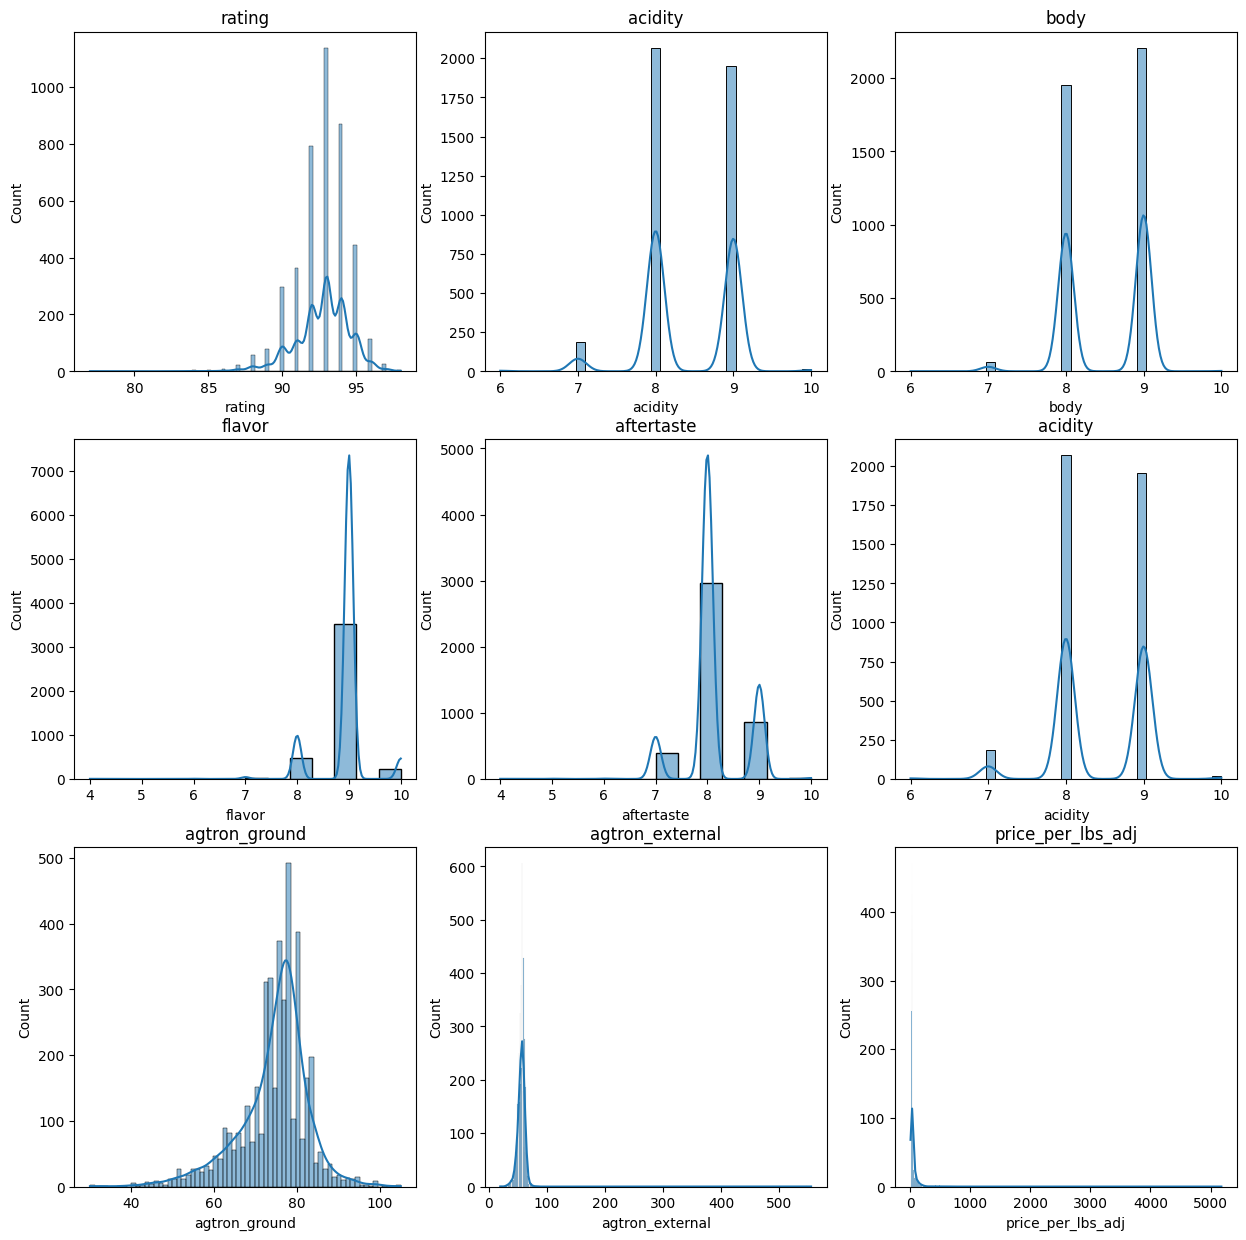

In [51]:
# Rating, acidity, body, flavor, aftertaste, acidity, agtrons, prive_per_lbs, quantity_lbs

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

cols = ['rating', 'acidity', 'body', 'flavor', 'aftertaste', 'acidity', 'agtron_ground', 'agtron_external',
        'price_per_lbs_adj', 'quantity_in_lbs']
for i, col in enumerate(cols):
    sns.histplot(coffee_numeric[col], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(col)

